Dataset Preview:
    Student ID  Study Hours  Attendance  Pass
0           1            5          80    75
1           2           10          90    85
2           3           15          70    65
3           4           12          85    80
4           5            8          60    70

Missing values:
 Student ID     0
Study Hours    0
Attendance     0
Pass           0
dtype: int64


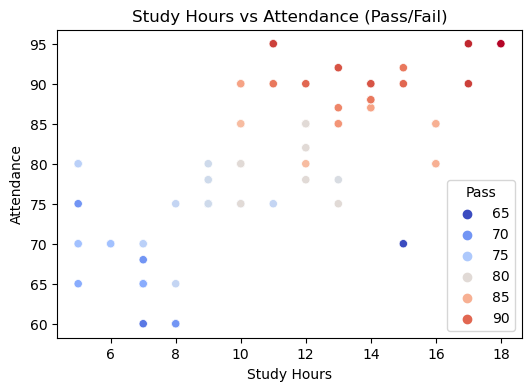


Model Accuracy: 0.15

Confusion Matrix:
 [[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 2 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]]

Classification Report:
               precision    recall  f1-score   support

          68       0.00      0.00      0.00         1
          70       1.00      0.33      0.50         3
          71       0.00      0.00      0.00         1
          72       0.20      1.00      0.33         1
          73       0.00      0.0

C:\Users\Shaarukesh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Shaarukesh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Shaarukesh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Shaarukesh\anaconda3\Lib\site-packages\

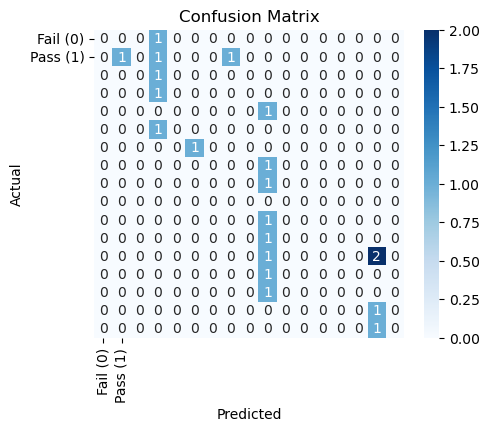

In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load dataset from CSV file
data = pd.read_csv("StudentsPerformance.csv")

# Display first few rows
print("Dataset Preview:\n", data.head())

# Checking for missing values
print("\nMissing values:\n", data.isnull().sum())

# Data visualization
plt.figure(figsize=(6,4))
sns.scatterplot(data=data, x='Study Hours', y='Attendance', hue='Pass', palette='coolwarm')
plt.title('Study Hours vs Attendance (Pass/Fail)')
plt.show()

# Splitting dataset into features (X) and target variable (y)
X = data[['Study Hours', 'Attendance']]
y = data['Pass']

# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Training Logistic Regression Model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Making predictions
y_pred = model.predict(X_test_scaled)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'\nModel Accuracy: {accuracy:.2f}')
print('\nConfusion Matrix:\n', conf_matrix)
print('\nClassification Report:\n', classification_report(y_test, y_pred))

# Plotting Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Fail (0)', 'Pass (1)'], yticklabels=['Fail (0)', 'Pass (1)'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
